In [6]:
import json
from pathlib import Path
import pandas as pd

data_root = Path("../data/wlasl-complete")   
json_path = data_root / "WLASL_v0.3.json"    

with open(json_path, "r") as f:
    data = json.load(f) 

print(type(data)) 

rows = []

for entry in data:
    gloss = entry["gloss"]
    instances = entry["instances"]
    
    for inst in instances:
        rows.append({
            "gloss": gloss,
            "video_id": inst["video_id"],
            "fps": inst.get("fps", None),
            "split": inst.get("split", None),
        })

df = pd.DataFrame(rows)
print(df.shape)
print(df.head())


<class 'list'>
(21083, 4)
  gloss video_id  fps  split
0  book    69241   25  train
1  book    65225   25  train
2  book    68011   25  train
3  book    68208   25  train
4  book    68012   25  train


In [3]:
! pip install pandas



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


gloss
book        40
drink       35
computer    30
chair       26
before      26
Name: count, dtype: int64
Number of classes: 2000


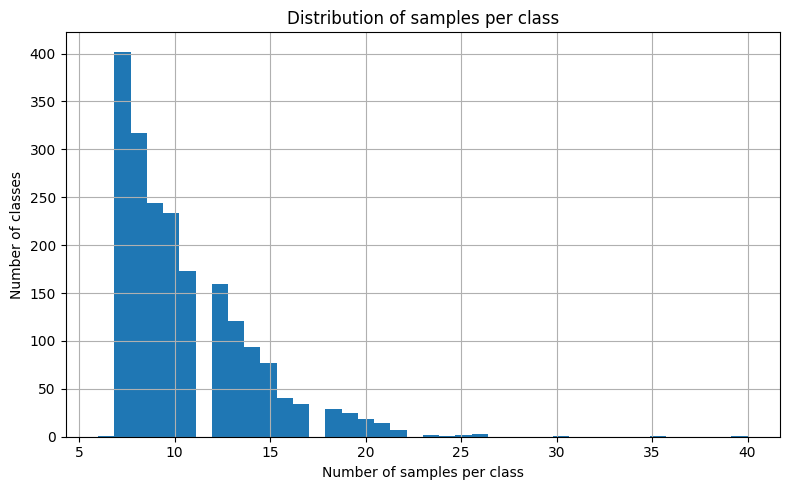

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
class_counts = df["gloss"].value_counts()

print(class_counts.head())
print("Number of classes:", len(class_counts))
plt.figure(figsize=(8, 5))
class_counts.hist(bins=40)
plt.title("Distribution of samples per class")
plt.xlabel("Number of samples per class")
plt.ylabel("Number of classes")
plt.tight_layout()
plt.show()


In [8]:
class_counts_sorted = class_counts.sort_values(ascending=False)
top_300_classes = class_counts_sorted.head(300).index
print("Selected classes:", len(top_300_classes))
top_300_classes[:10]



Selected classes: 300


Index(['book', 'drink', 'computer', 'chair', 'before', 'go', 'who', 'clothes',
       'candy', 'deaf'],
      dtype='object', name='gloss')

In [9]:
df_300 = df[df["gloss"].isin(top_300_classes)].copy()

print("Shape after filtering:", df_300.shape)
print("Classes:", df_300["gloss"].nunique())
df_300.head()


Shape after filtering: (5117, 4)
Classes: 300


,gloss,video_id,fps,split
0,book,69241,25,train
1,book,65225,25,train
2,book,68011,25,train
3,book,68208,25,train
4,book,68012,25,train


In [10]:
from pathlib import Path

video_root = Path("../data/wlasl-complete/videos")  
video_files = {v.stem for v in video_root.glob("*.mp4")}

df_300["exists"] = df_300["video_id"].astype(str).isin(video_files)

df_300["exists"].value_counts()


exists
True    5117
Name: count, dtype: int64

In [11]:
from pathlib import Path

out_path = Path("../data/wlasl_top300_metadata.csv")
df_300.to_csv(out_path, index=False)
out_path


WindowsPath('../data/wlasl_top300_metadata.csv')

After Extracting

In [12]:
from pathlib import Path

root = Path("../data/preprocessing/train/frames")

labels = [d.name for d in root.iterdir() if d.is_dir()]
print("Number of labels (classes) in train:", len(labels))
print("Some labels:", labels[:10])

sample_label = labels[0]
sample_vid_dir = next((root / sample_label).iterdir())
print("Sample video dir:", sample_vid_dir)

frames = list(sample_vid_dir.glob("*.jpg"))
print("Number of frames in this video:", len(frames))
print("First 3 frames:", frames[:3])


Number of labels (classes) in train: 297
Some labels: ['about', 'accident', 'africa', 'again', 'all', 'always', 'animal', 'apple', 'argue', 'arrive']
Sample video dir: ..\data\preprocessing\train\frames\about\65002
Number of frames in this video: 16
First 3 frames: [WindowsPath('../data/preprocessing/train/frames/about/65002/frame_000.jpg'), WindowsPath('../data/preprocessing/train/frames/about/65002/frame_001.jpg'), WindowsPath('../data/preprocessing/train/frames/about/65002/frame_002.jpg')]
